Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740

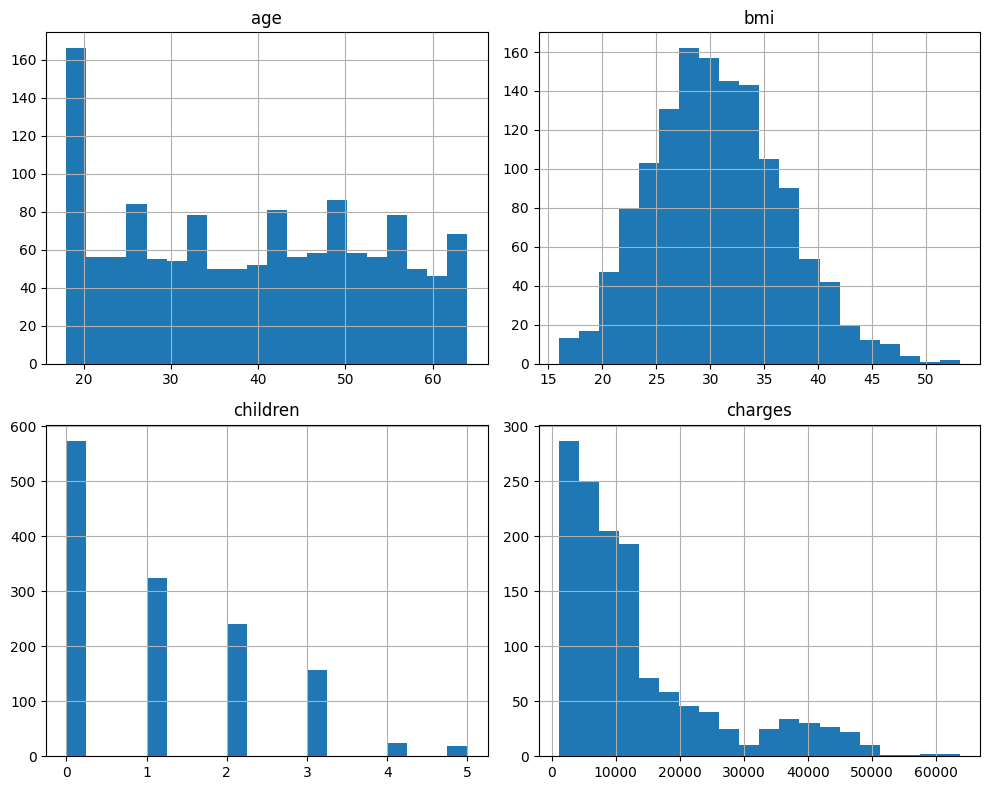

In [ ]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Mount Google Drive
drive.mount('/content/drive')

# Load the CSV file into a DataFrame
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/InsuranceData.csv')
print(df.info())
print(df.describe())
# Plot histograms for numerical columns
df.hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

In [ ]:
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [ ]:

df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/InsuranceData.csv')

# Check data structure
print(df.head())  # Ensure columns are numeric (Isolation Forest requires numeric input)
print(df.isnull().sum())  # Handle missing values if any

# Select features (adjust 'X' based on your columns)
X = df.select_dtypes(include=['float64', 'int64'])

# Fit Isolation Forest
clf = IsolationForest(
    contamination=0.02,  # Estimated % of anomalies (adjust based on domain knowledge)
    random_state=40,
    n_estimators=150,  # More trees = more stable results
    max_samples='auto'  # Default is 256; increase if dataset is large
)
clf.fit(X)

# Predict anomalies (-1 for anomalies, 1 for normal)
df['anomaly_score'] = clf.decision_function(X)  # Lower scores = more anomalous
df['is_anomaly'] = clf.predict(X)  # -1 = anomaly, 1 = normal

# Extract anomalies
anomalies = df[df['is_anomaly'] == -1]
print(f"Detected {len(anomalies)} anomalies out of {len(df)} samples.")

# Visualize anomalies (for 2D data)
if X.shape[1] == 2:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=X.columns[0], y=X.columns[1], hue='is_anomaly', palette={1: 'blue', -1: 'red'})
    plt.title("Isolation Forest Anomaly Detection")
    plt.show()

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
Detected 27 anomalies out of 1338 samples.


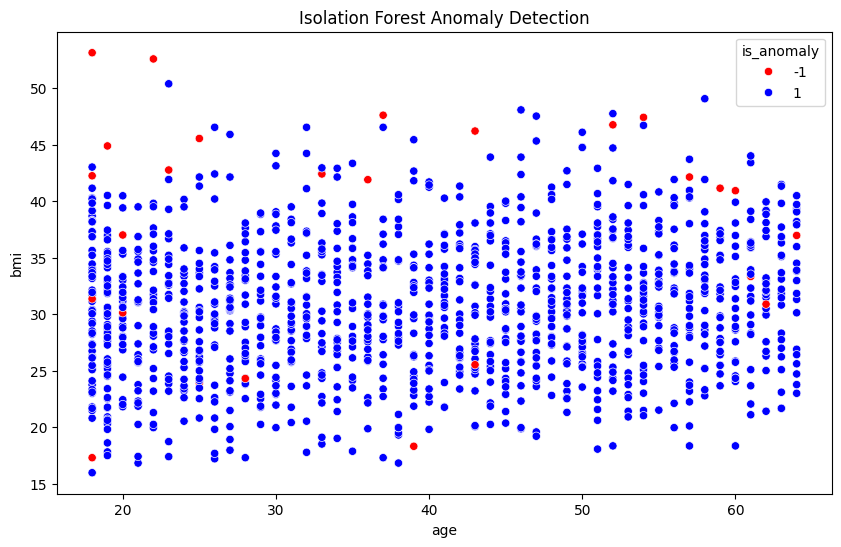

In [ ]:
# Plot anomalies vs normal data (assuming you have exactly two features)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=X.columns[0], y=X.columns[1], hue='is_anomaly', palette={1: 'blue', -1: 'red'})
plt.title("Isolation Forest Anomaly Detection")
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.show()

In [ ]:
# Assuming 'df' is your original DataFrame and 'is_anomaly' column contains the anomaly labels
df_cleaned = df[df['is_anomaly'] == 1]  # Keep only normal (non-anomalous) rows

# Check the shape after removing outliers
print(f"Original data shape: {df.shape}")
print(f"Cleaned data shape (after removing anomalies): {df_cleaned.shape}")

# Optionally, you can save the cleaned data to a new CSV
df_cleaned.to_csv('/content/drive/My Drive/Colab Notebooks/Cleaned_InsuranceData.csv', index=False)


Original data shape: (1338, 9)
Cleaned data shape (after removing anomalies): (1311, 9)


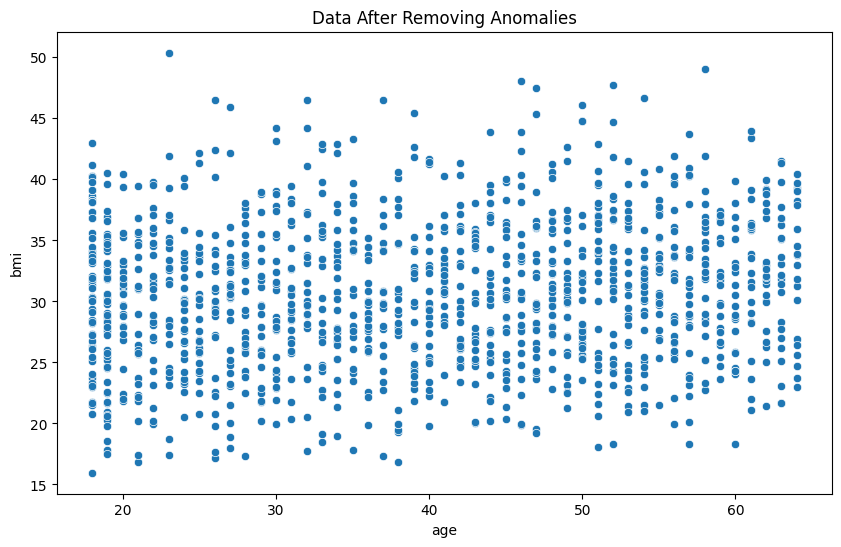

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='age', y='bmi')
plt.title("Data After Removing Anomalies")
plt.xlabel('age')
plt.ylabel('bmi')
plt.show()

In [ ]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# 1. Label Encoding for 'sex' (male = 1, female = 0)
df['sex'] = label_encoder.fit_transform(df['sex'])

# 2. Label Encoding for 'smoker' (yes = 1, no = 0)
df['smoker'] = label_encoder.fit_transform(df['smoker'])

# 3. One-Hot Encoding for 'region'
df = pd.get_dummies(df, columns=['region'], drop_first=True)

# Display the first few rows to confirm encoding
print(df.head())

# 4. Scaling the features (Standardization) for numerical columns
scaler = StandardScaler()

# Separate features and target
X = df.drop(columns=['charges'])  # Features (exclude target)
y = df['charges']  # Target variable

# Scale the features
X_scaled = scaler.fit_transform(X)

# Display the scaled data (first few rows of X_scaled)
print(np.round(X_scaled[:5], 2))  # Display first 5 rows of scaled features

   age  sex     bmi  children  smoker      charges  anomaly_score  is_anomaly  \
0   19    0  27.900         0       1  16884.92400       0.117696           1   
1   18    1  33.770         1       0   1725.55230       0.101665           1   
2   28    1  33.000         3       0   4449.46200       0.122317           1   
3   33    1  22.705         0       0  21984.47061       0.098376           1   
4   32    1  28.880         0       0   3866.85520       0.162965           1   

   region_northwest  region_southeast  region_southwest  
0             False             False              True  
1             False              True             False  
2             False              True             False  
3              True             False             False  
4              True             False             False  
[[-1.44 -1.01 -0.45 -0.91  1.97 -0.1   0.14 -0.57 -0.61  1.77]
 [-1.51  0.99  0.51 -0.08 -0.51 -0.43  0.14 -0.57  1.64 -0.57]
 [-0.8   0.99  0.38  1.58 -0.51 -0.01  

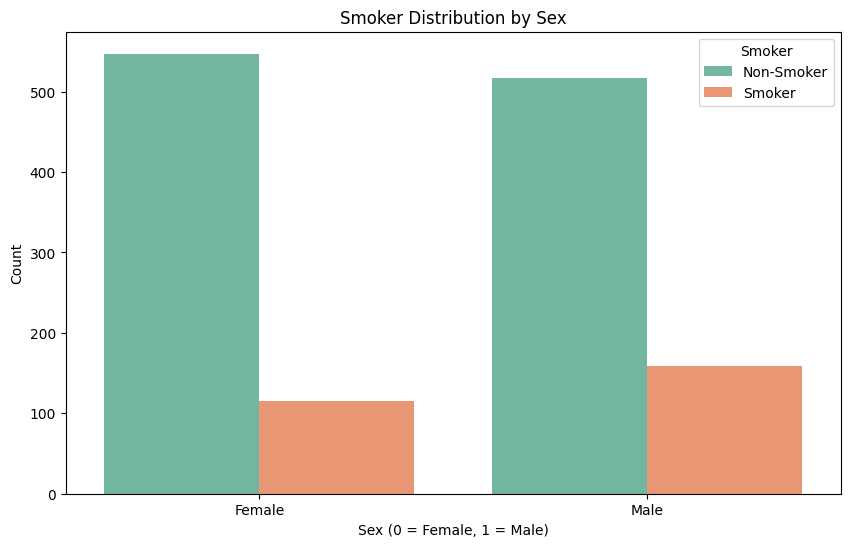

In [ ]:
# Plot distribution of smokers by sex
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='sex', hue='smoker', palette='Set2')
plt.title('Smoker Distribution by Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])  # Label sex axis
plt.legend(title='Smoker', labels=['Non-Smoker', 'Smoker'])
plt.show()

In [ ]:
# L1 Regularization

from sklearn.linear_model import Lasso

# Assuming X_scaled and y are defined from the previous code

# Initialize Lasso regression with alpha (regularization strength)
lasso_reg = Lasso(alpha=0.1)  # Adjust alpha as needed

# Fit the model
lasso_reg.fit(X_scaled, y)

# Get the coefficients
coefficients = lasso_reg.coef_

# Print the coefficients
print("Coefficients:", coefficients)

# Make predictions
y_pred = lasso_reg.predict(X_scaled)

# Evaluate the model (example using R-squared)
from sklearn.metrics import r2_score

r2 = r2_score(y, y_pred)
print("R-squared:", r2)


Coefficients: [ 3703.23528183  -124.74026369  1515.22725522  -524.57193677
  7938.22076615 -3518.98141585   328.56586894    42.89319642
  -568.41949865  -294.362214  ]
R-squared: 0.7980269905100539


X_train shape: (1070, 10)
y_train shape: (1070,)
X_test shape: (268, 10)
y_test shape: (268,)


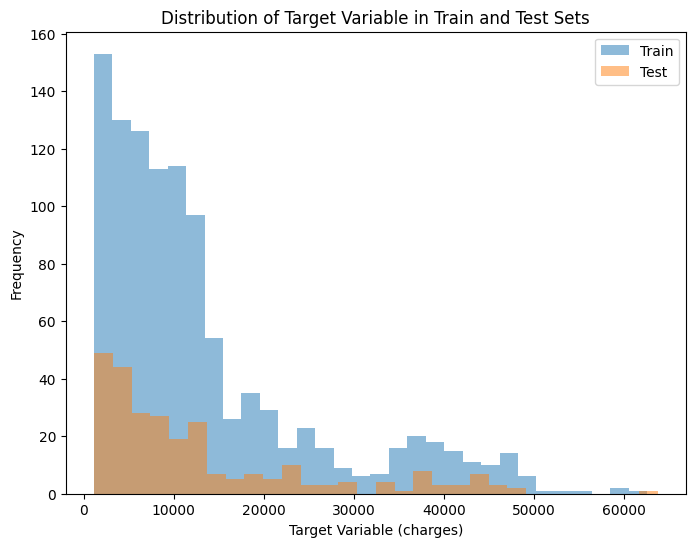

In [ ]:
# prompt: split my data into train set and test set and visualize it

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Assuming X_scaled and y are defined from the previous code (features and target)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Print shapes to verify the split
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Visualize the split (example: distribution of target variable)
plt.figure(figsize=(8, 6))
plt.hist(y_train, bins=30, alpha=0.5, label='Train')
plt.hist(y_test, bins=30, alpha=0.5, label='Test')
plt.xlabel('Target Variable (charges)')
plt.ylabel('Frequency')
plt.title('Distribution of Target Variable in Train and Test Sets')
plt.legend(loc='upper right')
plt.show()


In [ ]:
# prompt: do a linear regression on my model with the lasso in mind

# Initialize Lasso regression with alpha (regularization strength)
lasso_reg = Lasso(alpha=0.1)  # Adjust alpha as needed

# Fit the model using training data
lasso_reg.fit(X_train, y_train)

# Get the coefficients
coefficients = lasso_reg.coef_

# Print the coefficients
print("Coefficients:", coefficients)

# Make predictions on the test set
y_pred = lasso_reg.predict(X_test)

# Evaluate the model (example using R-squared)
r2 = r2_score(y_test, y_pred)
print("R-squared (test set):", r2)


Coefficients: [ 3766.68959986   -97.17719935  1471.40190409  -674.65296879
  7802.70029602 -3686.79989805   354.98560149    90.3062631
  -448.24227198  -223.51887467]
R-squared (test set): 0.8162625410888501


In [ ]:
# prompt: I want to see the output

Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       1338 non-null   int64
 1   sex       1338 non-null   object
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64
 4   smoker    1338 non-null   object
 5   region    1338 non-null   object
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
              age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
Detected 27 anomalies out of 1338 samples.
Original data shape: (1338, 9)
Cleaned data shape (after removing anomalies): (1311, 9)
Coefficients: [ 2.96189856e+04 -1.31495150e+03  2.06855755e+04  5.55913582e+03
  9.04120327e+04  2.54138915e+03  1.32256923e+03 -1.79886284e+03
 -1.69799924e+03]
R-squared (test set): 0.7479402064365803
